<a href="https://colab.research.google.com/github/evansemet/Jane-Street-Solutions/blob/main/2014_01_Sum_Of_Squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install z3-solver
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from z3 import *

In [40]:
# information given about divisibility of each row and column
rowsGiven = np.array([1, 2, 3, 4, 5], dtype=int)
colsGiven = np.array([6, 7, 8, 9, 10], dtype=int)

In [43]:
# solve function with the help of Z3
def solve():
    print("Solving...")
    start = time.time()
    # uses optimize instead of solver since the highest sum is the goal
    s = Optimize()
    X = np.array(IntVector('x', 5 * 5), dtype=object).reshape((5, 5))   

    # maximizes total sum and checks that all values fall between 0 and 9
    s.maximize(Sum([val for val in X.ravel()]))
    s += [And(val >= 0, val <= 9) for val in X.ravel()]

    # converts each row and column into a single number and then checks constraints
    convert = lambda x: Sum([x[i] * 10 ** (4 - i) for i in range(5)])
    s += [convert(X[r, :]) % int(rowsGiven[r]) == 0 for r in range(5)]
    s += [convert(X[:, c]) % int(colsGiven[c]) == 0 for c in range(5)]

    if s.check() == sat:
      m = s.model()
      evalu = np.vectorize(lambda x: m.evaluate(x).as_long())
      r = evalu(X)
      fig,ax = plt.subplots(1,1,figsize=(3,3))
      ax = sns.heatmap(np.zeros_like(r), annot=r, cbar=False, cmap="Greys", linecolor='k', linewidth=2, annot_kws={"fontsize":14})
      ax.axis("off")
      print(f"Answer is: {np.sum(r)},", "".join(str(val) for val in r.ravel()))
      print(f"Solved in {time.time() - start} seconds.")
    else:
      print(f"Failed in {time.time() - start} seconds.")    

Solving...
Answer is: 205, 9899999998798999989689890
Solved in 1.2301218509674072 seconds.


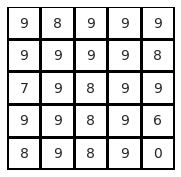

In [44]:
# runs code
solve()